## Multiple Linear Regression with PCA

- regression having one dependent variable and multiple independent variables (>2)
- multivariate dataset

#### import required packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### load the data

In [2]:
df = pd.read_csv('50_Startups.csv')
print(df.head())

         RnD  Administration  Marketing       State     Profit
0  165349.20       136897.80  471784.10    New York  192261.83
1  162597.70       151377.59  443898.53  California  191792.06
2  153441.51       101145.55  407934.54     Florida  191050.39
3  144372.41       118671.85  383199.62    New York  182901.99
4  142107.34        91391.77  366168.42     Florida  166187.94


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### data cleansing process

In [4]:
# since there is no missing value, we dont have to replace any of them
print(df.isna().sum())

RnD               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64


In [5]:
# since state columns is not numeric, we have to convert the text values to numeric ones
state_unique_values = df['State'].unique()
print(state_unique_values)

['New York' 'California' 'Florida']


#### replacement logic

we have following categories
- 'New York' 
- 'California' 
- 'Florida'

replace every category with one numeric representation
- 'New York' will be replaced with **1**
- 'California' will be replaced with **2**
- 'Florida' will be replaced with **3**

In [6]:
# since the values are pretty small we can decide the replacement
# replacement_values = [1, 2, 3]

# but if the unique values are pretty having large set of values then create the replacement array dynamically
replacement_values = np.arange(1, len(state_unique_values) + 1)

# replace the state values with replacement_values

# replaces the state values with numeric values and returns a new dataset
# df = df.replace(state_unique_values, replacement_values)

# replace the state values with numeric ones in the same dataset
df.replace(state_unique_values, replacement_values, inplace=True)

print(df.head())

         RnD  Administration  Marketing  State     Profit
0  165349.20       136897.80  471784.10      1  192261.83
1  162597.70       151377.59  443898.53      2  191792.06
2  153441.51       101145.55  407934.54      3  191050.39
3  144372.41       118671.85  383199.62      1  182901.99
4  142107.34        91391.77  366168.42      3  166187.94


In [7]:
corr = df.corr()
print(corr)

                     RnD  Administration  Marketing     State    Profit
RnD             1.000000        0.241955   0.724248  0.037930  0.972900
Administration  0.241955        1.000000  -0.032154  0.003026  0.200717
Marketing       0.724248       -0.032154   1.000000  0.137777  0.747766
State           0.037930        0.003026   0.137777  1.000000  0.048471
Profit          0.972900        0.200717   0.747766  0.048471  1.000000


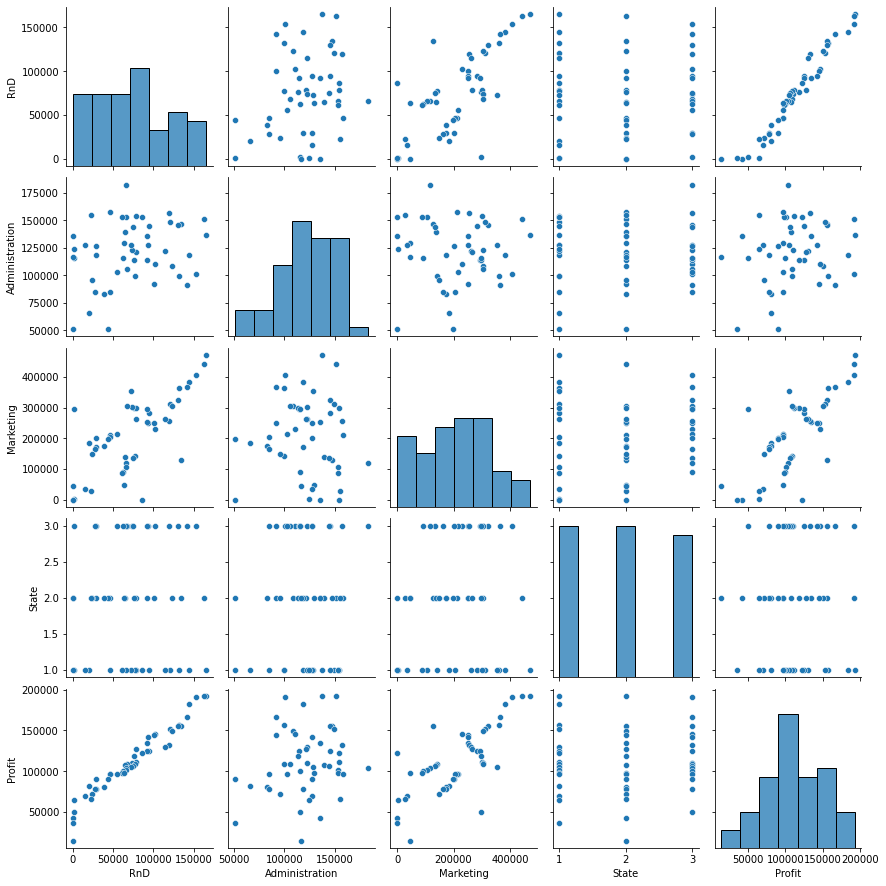

In [8]:
sns.pairplot(df)

#### preparing the dataset

In [9]:
# decide the x and y
x = df.drop(['Profit', 'State'], axis=1)
y = df['Profit']

### use PCA and extract new features

In [10]:
from sklearn.decomposition import PCA

# create pca
pca = PCA(n_components=1)

# get the feature extracted
# replace the original x with newly extracted features
x = pca.fit_transform(x)

In [11]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

#### create and train the model

In [12]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

#### evaluate the model

In [13]:
# predict the x_test
y_prediction = model.predict(x_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
MAE = mean_absolute_error(y_test, y_prediction)
print(f"mean absolute error = {MAE}")

mean absolute error = 15875.937879540745


In [16]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"mean squared error = {MSE}")

mean squared error = 466763297.72555


In [17]:
RMSE = np.sqrt(MSE)
print(f"root mean squared error = {RMSE}")

root mean squared error = 21604.705453339324


In [18]:
R2 = r2_score(y_test, y_prediction)
print(f"R2 score = {R2}")

R2 score = 0.6284112646924039


### visualization

Text(0.5, 1.0, 'Final Visualization')

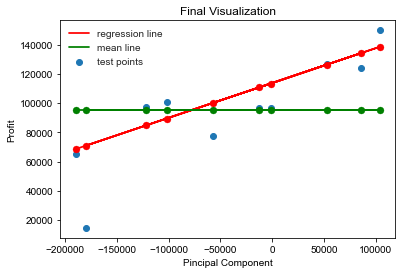

In [19]:
# plot all the experience and salary points from test dataset (observed)
plt.scatter(x_test, y_test, label="test points")
plt.style.use('seaborn')

# plot a best fit regression line
plt.scatter(x_test, y_prediction, color="red")
plt.plot(x_test, y_prediction, color="red", label="regression line")

# plot a mean line
y_mean = np.ones(len(y_test)) * y_test.mean() 
plt.plot(x_test, y_mean, color="green", label="mean line")
plt.scatter(x_test, y_mean, color="green")

plt.legend()
plt.xlabel("Pincipal Component")
plt.ylabel("Profit")
plt.title("Final Visualization")